<img src="logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 03/07/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os
import sys
import pandas as pd
import datetime
#import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot") # deixa grafico com fundo cinza

Importar as bibliotecas necessárias e mapear a pasta do projeto.


 ## Variáveis globais

In [2]:
dict_colors = {
    'red':'\033[0;31m'
    ,'green':'\033[0;32m'
    ,'yellow':'\033[0;33m'
    ,'blue':'\033[0;34m'
    ,'blue_underline':'\033[4;34m'
    ,'roxo':'\033[0;35m'
    ,'ciano':'\033[0;36m'
    ,'cinza':'\033[0;37m'
    ,'black&red':'\033[0;31;40m'
    ,'close_color':'\033[m'
}

In [3]:
data_inicio = pd.Timestamp.now()
dataFormatada = data_inicio.strftime('%d-%m-%Y %H-%M-%S')

path_image = os.path.join('..','image')

print(f"Iniciando o programa em: {dict_colors['blue_underline']}{dataFormatada}{dict_colors['close_color']}")

Iniciando o programa em: 19-07-2022 00-59-51


In [4]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-completa-29-06-2022 03-07-24.xlsx',
 'bases_filtradas-resumida-29-06-2022 03-07-24 (1).xlsx',
 'bases_filtradas-resumida-29-06-2022 03-07-24.xlsx',
 'bases_filtradas_traduzida-26-09-2021.xlsx',
 'bkp',
 'de-para.txt',
 'FiltrodoExport.PNG',
 'fluxos-processos.drawio',
 'pubmed-csv-naturallan-set-2022.csv',
 'QuantidadedeDocumentos.PNG',
 'QuantidadedeSourceType.PNG',
 'resultado_pubmed-29-06-2022 03-07-24.xlsx',
 'resultado_scopus_10-07-2022 00-12-13.xlsx',
 'resultado_scopus_29-06-2022 03-07-24.xlsx',
 'scopus-31-05-2022.csv',
 'scopus.csv',
 'scopusBook.csv',
 'scopusBookSeries.csv',
 'scopusConferenceProceeding.csv',
 'scopusJournal.csv',
 'scopusJournalcont.csv',
 'scopusTradeJournal.csv',
 'scopusUndefined.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

# Preparar e carregar base de dados

## Carregar Planilha - Documentos para o Trabalho Relacioandos

In [5]:
#trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas_traduzida-27-06-2021.xlsx')
#trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas_traduzida-26-09-2021.xlsx') # 436 registros
#trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas-resumida-14-06-2022.xlsx') # 513 regitros
#trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas-resumida-29-06-2022 03-07-24_final.xlsx') # 534 regitros

trabalhos_relacionados_traduzido = r'G:\Meu Drive\MESTRADO_C_DADOS\ARTIGOS E AFINS\DOCUMENTOS-MESTRADO-CEFET-METAMAP-NLP\Artigos-MetaMap-2022\bases_filtradas-resumida-06-2022.xlsx'
raw_data = pd.read_excel(trabalhos_relacionados_traduzido)
raw_data

,eid,doi,titulo_documento,titulo_documento_traduzido,ano,palavras_chaves_titulo,quantidade_citacoes,resumo,resumo_traduzido_google_translator,palavras_chaves_resumo,...,leitura_conclusao,sincronizado_mendeley,data_leitura_resumo,data_leitura_completa,status_resumo,citado_no_trabalho,leitura_introducao,Ler-artigo-completo?,obs_introducao,leitura_conclusao.1
0,2-s2.0-85076585439,10.1093/jamia/ocz166,2018 n2c2 shared task on adverse drug events a...,2018 N2C2 Tarefa compartilhada em eventos adve...,2020.0,NaN,38.0,objective: this article summarizes the prepara...,"Objetivo: Este artigo resume a preparação, org...",NaN,...,0,0.0,44374,0,Ruim,0.0,0,0.0,0,0
1,2-s2.0-0026721457,10.1177/106002809202600704,development of a questionnaire for detecting p...,Desenvolvimento de um questionário para detect...,1992.0,NaN,30.0,objective: to develop a comprehensive list of ...,Objetivo: Desenvolver uma lista abrangente de ...,twitter|metamap|nlp,...,0,0.0,0,0,0,0.0,0,0.0,0,0
2,2-s2.0-0034233257,10.1016/s1386-5056(00)00062-9,the use of a medical dictionary for regulatory...,O uso de um dicionário médico para terminologi...,2000.0,NaN,22.0,the medical dictionary for regulatory activiti...,O Dicionário Médico para Terminologia das Ativ...,NaN,...,0,0.0,0,0,0,0.0,0,0.0,0,0
3,2-s2.0-0035752429,NaN,effective mapping of biomedical text to the um...,Mapeamento eficaz do texto biomédico para o Me...,2001.0,twitter|metamap|nlp,1339.0,"the umls metathesaurus, the largest thesaurus ...","O Metathesaurus UMLS, o maior tesauro no domín...",twitter|metamap|nlp,...,0,0.0,0,0,0,0.0,0,0.0,0,0
4,2-s2.0-85107194770,10.1109/tcbb.2021.3081268,a comprehensive review of computational method...,Uma revisão abrangente dos métodos computacion...,2021.0,NaN,2.0,the detection of drug-drug interactions (ddis)...,A detecção de interações medicamentosas (DDIs)...,twitter|metamap|nlp,...,0,0.0,44375,0,Ruim,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2-s2.0-85122016600,10.2196/28632,text mining of adverse events in clinical tria...,Mineração de texto de eventos adversos em ensa...,2021.0,NaN,NaN,background: pharmacovigilance and safety repor...,Antecedentes: Relatórios de farmacovigilância ...,twitter|metamap|nlp,...,1,0.0,2022-07-17 00:00:00,NaN,Ruim,NaN,0,NaN,NaN,NaN
530,2-s2.0-85109166512,10.2196/30137,the use of social media in detecting drug safe...,O uso de mídias sociais na detecção de seguran...,2021.0,twitter|metamap|nlp,4.0,background: social media has become a new sour...,Antecedentes: A mídia social se tornou uma nov...,twitter|metamap|nlp,...,1,0.0,2022-07-17 00:00:00,NaN,Ruim,NaN,0,NaN,NaN,NaN
531,2-s2.0-85077506999,10.1007/s13721-019-0216-2,web information extraction for finding remedy ...,Extração de informações da Web para encontrar ...,2020.0,NaN,4.0,automatic medical diagnosis and remedy finding...,O diagnóstico médico automático e a descoberta...,NaN,...,0,0.0,44375,0,Ruim,0.0,0,0.0,0,0
532,NaN,10.1007/s40264-022-01153-8,validation of artificial intelligence to suppo...,Validação da inteligência artificial para apoi...,NaN,NaN,NaN,NaN,em,NaN,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


## Analisar dados brutos original

### Analisando base

In [6]:
#pd.set_option("max_colwidth", 200)

In [7]:
print('Verificando colunas, dados nulos e tipos de dados')
raw_data.info()

Verificando colunas, dados nulos e tipos de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   eid                                               517 non-null    object 
 1   doi                                               439 non-null    object 
 2   titulo_documento                                  534 non-null    object 
 3   titulo_documento_traduzido                        534 non-null    object 
 4   ano                                               517 non-null    float64
 5   palavras_chaves_titulo                            130 non-null    object 
 6   quantidade_citacoes                               442 non-null    float64
 7   resumo                                            517 non-null    object 
 8   resumo_traduzido_google_translator                

In [8]:
print('Verificando quantidade de conteúdo único para cada coluna')
raw_data.nunique()

Verificando quantidade de conteúdo único para cada coluna


eid                                                 517
doi                                                 435
titulo_documento                                    534
titulo_documento_traduzido                          533
ano                                                  23
palavras_chaves_titulo                                1
quantidade_citacoes                                  81
resumo                                              517
resumo_traduzido_google_translator                  518
palavras_chaves_resumo                                1
conclusao_traduzida                                   0
quantidade_paginas_                                  24
status_pagina                                         2
link_scopus                                         519
editor                                               73
nome_conferencia                                    122
data_conferencia                                    121
local_conferencia                               

In [9]:
# verificar campos nulos
raw_data.isnull().sum()

eid                                                  17
doi                                                  95
titulo_documento                                      0
titulo_documento_traduzido                            0
ano                                                  17
palavras_chaves_titulo                              404
quantidade_citacoes                                  92
resumo                                               17
resumo_traduzido_google_translator                    7
palavras_chaves_resumo                              142
conclusao_traduzida                                 534
quantidade_paginas_                                  17
status_pagina                                        17
link_scopus                                          15
editor                                              116
nome_conferencia                                    382
data_conferencia                                    382
local_conferencia                               

In [10]:
raw_data.describe()

,ano,quantidade_citacoes,conclusao_traduzida,quantidade_paginas_,status_pagina,codigo_conferencia,ano_publicacao_pubmed,documentos_6+,documentos_94+,pdf_baixado,leitura_resumo,leitura_completa,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP,conceituar_outros,leitura_conclusao,sincronizado_mendeley,citado_no_trabalho,Ler-artigo-completo?
count,517.000000,442.000000,0.0,517.000000,517.000000,141.000000,17.000000,425.000000,425.000000,505.000000,534.000000,475.000000,469.0,469.0,517.000000,426.000000,534.000000,482.000000,464.000000,440.000000
mean,2016.141199,25.364253,NaN,7.282398,0.729207,144993.531915,2020.000000,0.009412,0.197647,0.219802,0.599251,0.002105,0.0,0.0,0.001934,0.058685,0.080524,0.024896,0.006466,0.131818
std,4.480079,75.686074,NaN,12.342085,0.444800,40360.816597,2.150581,0.096670,0.398694,0.414523,0.490510,0.045883,0.0,0.0,0.043980,0.235311,0.272358,0.155971,0.080235,0.338678
min,1992.000000,1.000000,NaN,1.000000,0.000000,70370.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,3.000000,NaN,1.000000,0.000000,116956.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,10.000000,NaN,7.000000,1.000000,134300.000000,2021.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,25.000000,NaN,10.000000,1.000000,173047.000000,2022.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,1339.000000,NaN,264.000000,1.000000,274699.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Copiar dataframe para ajustes

In [11]:
## Verificar se os dataframes nao s"ao espelhos
df_trab_relacionados = raw_data.copy()

print(id(df_trab_relacionados), id(raw_data))

1867327815584 1867326786672


# Visualizações

## Leitura das Introduções

**Obervações**
<br>
- 06+ = 5 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    1 tinha 3 páginas e não foi possível baixar o pdf para analisar:
    <br>"Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing"
    
    <br>

In [12]:
# Groupby by
leitura_resumo = df_trab_relacionados.groupby("leitura_resumo")

# Summary statistic of all
leitura_resumo.describe().head()

ano                                                         \
                count         mean       std     min     25%     50%     75%   
leitura_resumo                                                                 
0               212.0  2012.372642  4.293476  1992.0  2010.0  2013.0  2015.0   
1               305.0  2018.760656  2.117850  2011.0  2017.0  2019.0  2020.0   

                       quantidade_citacoes             ... citado_no_trabalho  \
                   max               count       mean  ...                75%   
leitura_resumo                                         ...                      
0               2021.0               188.0  33.877660  ...                0.0   
1               2022.0               254.0  19.062992  ...                0.0   

                    Ler-artigo-completo?                                    \
                max                count     mean       std  min  25%  50%   
leitura_resumo                                                               
0               0.0                177.0  0.00565  0.075165  0.0  0.0  0.0   
1               1.0                263.0  0.21673  0.412803  0.0  0.0  0.0   

                          
                75%  max  
leitura_resumo            
0               0.0  1.0  
1               0.0  1.0  

[2 rows x 152 columns]

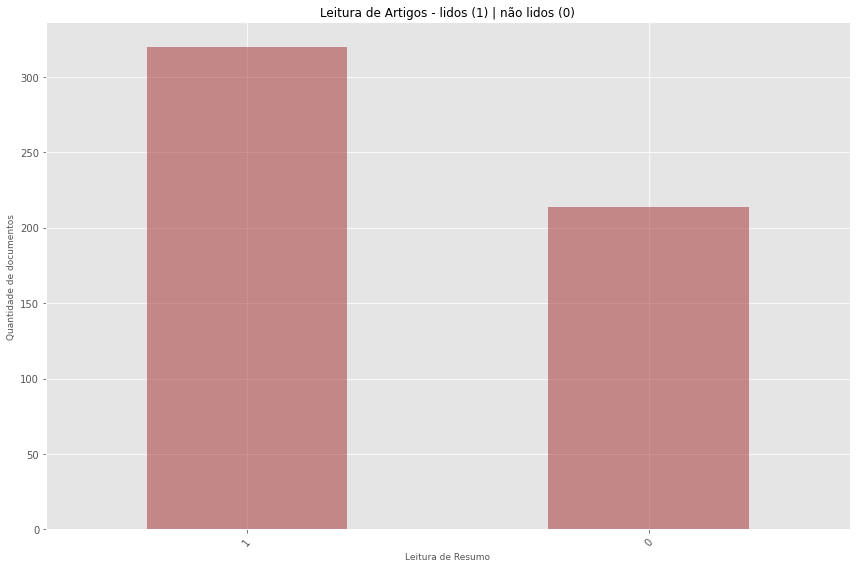

In [13]:
# variáveis
titulo = 'Leitura de Artigos - lidos (1) | não lidos (0)'
eixo_x = 'Leitura de Resumo'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'leitura_documentos_'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
leitura_resumo.size().sort_values(ascending=False).plot.bar(linestyle='--', linewidth=300, color='Brown', alpha = 0.5)
plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
#plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

In [14]:
## Dos separadas para ler, quais sao bons, execelentes e razoáveis

In [15]:
# Groupby by
status_resumo = df_trab_relacionados.groupby("status_resumo")

# Summary statistic of all
status_resumo.describe().head()

ano                                                         \
               count         mean       std     min     25%     50%     75%   
status_resumo                                                                 
0              209.0  2012.291866  4.255763  1992.0  2010.0  2013.0  2015.0   
Bom             60.0  2017.850000  2.666967  2011.0  2016.0  2018.0  2020.0   
Excelente       19.0  2018.736842  2.156182  2014.0  2017.5  2019.0  2020.5   
Razoavel        51.0  2017.980392  2.240448  2014.0  2017.0  2018.0  2019.5   
Ruim           178.0  2019.280899  1.694049  2014.0  2018.0  2019.0  2021.0   

                      quantidade_citacoes             ... citado_no_trabalho  \
                  max               count       mean  ...                75%   
status_resumo                                         ...                      
0              2021.0               186.0  33.887097  ...                0.0   
Bom            2022.0                48.0  41.833333  ...                0.0   
Excelente      2022.0                14.0  26.642857  ...                0.0   
Razoavel       2022.0                46.0  18.630435  ...                0.0   
Ruim           2022.0               148.0  11.283784  ...                0.0   

                   Ler-artigo-completo?                                     \
               max                count      mean       std  min  25%  50%   
status_resumo                                                                
0              0.0                174.0  0.000000  0.000000  0.0  0.0  0.0   
Bom            1.0                 52.0  0.865385  0.344642  0.0  1.0  1.0   
Excelente      0.0                 17.0  0.764706  0.437237  0.0  1.0  1.0   
Razoavel       0.0                 41.0  0.000000  0.000000  0.0  0.0  0.0   
Ruim           1.0                156.0  0.000000  0.000000  0.0  0.0  0.0   

                         
               75%  max  
status_resumo            
0              0.0  0.0  
Bom            1.0  1.0  
Excelente      1.0  1.0  
Razoavel       0.0  0.0  
Ruim           0.0  0.0  

[5 rows x 160 columns]

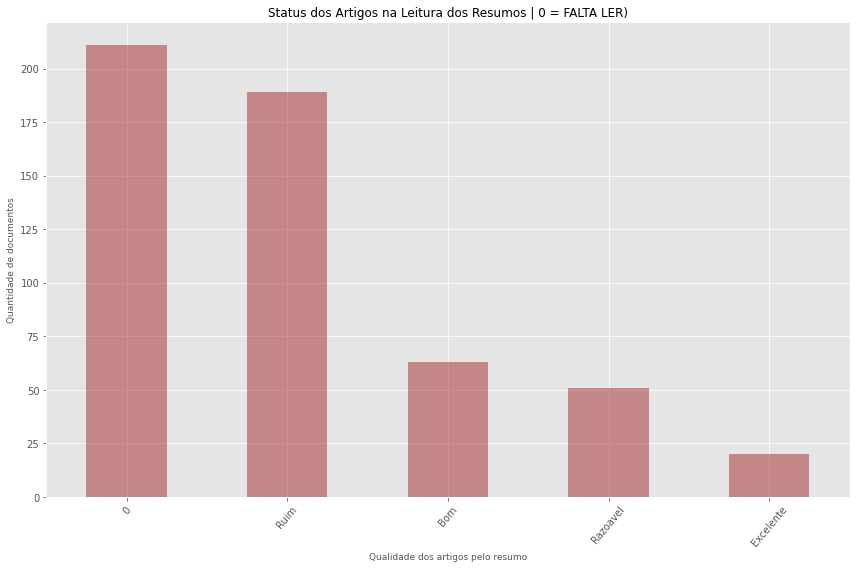

In [16]:
# variáveis
titulo = 'Status dos Artigos na Leitura dos Resumos | 0 = FALTA LER)'
eixo_x = 'Qualidade dos artigos pelo resumo'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'leitura_documentos_'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
status_resumo.size().sort_values(ascending=False).plot.bar(linestyle='--', linewidth=300, color='Brown', alpha = 0.5)
plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

# Artigos que podem entrar e nao entrou

- Pharmacovigilance in the era of social media: Discovering adverse drug events cross-relating Twitter and PubMed 
<br>(ao pesquisar   TITLE-ABS-KEY ( mining  AND for  AND adverse  AND drug  AND events  AND on  AND twitter ) ) = 28 resultados
- Detection of adverse drug reaction from twitter data
    - e outros com a query acima
- SSEL-ADE: A semi-supervised ensemble learning framework for extracting adverse drug events from social media, mesmo autor de um artigo interessante da pesquisa ()
- Adaptation of algorithms for medical information retrieval for working on russian-language text content



# Curiosidades

**dois artigos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

# Tempo de Execução do trabalho

In [17]:
data_fim = pd.Timestamp.now()
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}. Tempo de {data_fim - data_inicio}.')

Programa iniciado em: 2022-07-19 00:59:51.017693, e terminado em 2022-07-19 00:59:52.277061. Tempo de 0 days 00:00:01.259368.


In [18]:
print(f'Shape da planinha: {df_trab_relacionados.shape}')

Shape da planinha: (534, 52)
